In [1]:
### fix how M values is taken in
### Switch to Jupyter Notebook
### Import Data
### Make a special data file with only 10 events or so
### Plot the raw signals from those 10 events
### Plot resulting Trapezoids
# figure out calibration
# Plot the full, calibrated energy spectra for Co, Cs, Am (to check for re-takes)
# Fit peaks and get FWHM Values
# Plot FWHM vs gap time
# Plot FWHM vs peak time
# Set optimal peak and gap times and save spectrum
# Make electronic noise plot
# calculate FANO factor
# Write text
# Write TEST functions
# BASELINE CORREXTION #np.mean(data['Rawdata']) np apply along axis 0 =comuln, 1 = row
# REDO DATA Cs = low stats, Co maybe okay, Am/ Co peaks?/ pulser?

#BASELINE CORREXTION #np.mean(data['Rawdata']) np apply along axis 0 = comuln, 1 = row, reshape?
#def fast_baseline_correction(data):


In [1]:
%run lab1_analysis_functions.py

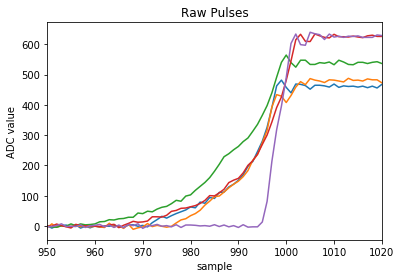

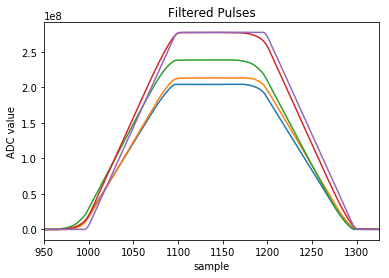

In [2]:
tenevents = read_ten_event_file()
ndata = len(tenevents)
nsamples = 4096
x_values = np.linspace(0, nsamples, nsamples)
tenevents = fast_baseline_correction(tenevents)
for event in tenevents[0:5]:
    plt.plot(event)
plt.xlim([950, 1020])
plt.title('Raw Pulses')
plt.ylabel('ADC value')
plt.xlabel('sample')
plt.savefig('tenevents_rawdata.pdf')
plt.show()

k = 100 
m = 100 
M = 4400

#tenevents = read_ten_event_file()
#x_values = np.linspace(0, nsamples, nsamples)
#baseline = np.mean(tenevents[:ndata,0:99],1).reshape((ndata,1))
#baseline_corrected = tenevents[:ndata,] - baseline
#tenevents = np.apply_along_axis(fast_trapezoidal_filter, 1 , tenevents[:ndata,] , k, m, M)

for event in tenevents[0:5]:
    event = fast_trapezoidal_filter(event, k, m, M=4400)
    plt.plot(x_values, event)
plt.xlim([950, 1325])
plt.title('Filtered Pulses')
plt.ylabel('ADC value')
plt.xlabel('sample')
plt.savefig('tenevents_filtered.pdf')
plt.show()

In [5]:
# filename = 'data/co60.h5'
filename = 'data/Cs_pulser_real.h5'
raw_data = import_data(filename)

4.30536103249
('M : ', 5922.0808199938656)
0.363183021545


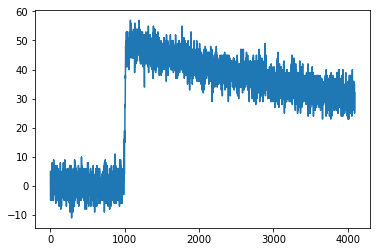

plot
0.890286207199
trap
0.00114297866821


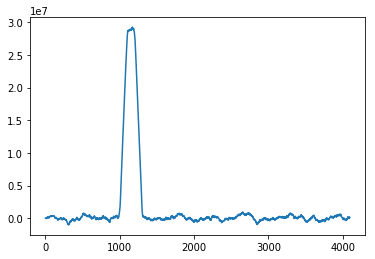

29240768.7243


In [6]:
start = time.time()
sampling_time = 10.0
number_of_events = len(raw_data)
n_data = 4096
x_values = np.linspace(0, nsamples, nsamples)
baseline = np.mean(raw_data[0:number_of_events,0:799],1).reshape((number_of_events,1))
signals = raw_data[:number_of_events,] - baseline

end1 = time.time()
print(end1 - start)

start = time.time()
M = find_M_value(signals[0:10])
print('M : ', M)
end1 = time.time()
print(end1 - start)

start = time.time()
signal = signals[0,:]
plt.plot(signal)
plt.show()
end1 = time.time()
print('plot')
print(end1 - start)

start = time.time()

peaking_time = 100 
gap = 100 
#M = 4400
filtered_signal = fast_trapezoidal_filter(signal, gap, peaking_time, M)

end1 = time.time()
print('trap')
print(end1 - start)
start = time.time()

plt.figure(41)
plt.cla()
plt.clf()
plt.plot(x_values, filtered_signal)
plt.show()
energy = get_energy_value(filtered_signal)
print(energy)

In [229]:
#k_values = np.linspace(500, 10000, 2) # steps in 100 ns from 1ns to 10us
m_values = np.linspace(2000, 100000, 2) # steps in 100 ns from 1ns to 10us

k_values = [100]
m_values = np.linspace(0, 1000, 250) 
fwhm_values_2 = []
m_values_ns_2 = []
k = k_values[0]

x_values = np.linspace(0, nsamples, nsamples)
baseline = np.mean(raw_data[,0:99],1).reshape((ndata,1))
baseline_corrected_signals = raw_data - baseline

M = find_M_value(raw_data, 100)
print(M)

for m in m_values:
    m = int(m)
    m_values_ns_2.append(m * 10)
    #nrgs = []
    #ndata = len(raw_data)
    assert number_of_events <= len(raw_data)
    nrgs = np.apply_along_axis(fast_trapezoidal_filter, 1, baseline_corrected_signals , k, m, M)
   # print(nrgs)
   # for i in range(0, number_of_events, 1):
    #    signal = raw_data[i,:]
    #    nrg = filter_and_get_energy(signal, l, k, M)
    #    nrgs.append(round(nrg, 7))
        
    nbins = 2048
    co_counts, bin_edges = np.histogram(nrgs, bins=2048, range=[2.3e8, 2.8e8]) # WORKS
    bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
    #co_energies = calibrate_co_spectrum(nrgs)
    #fwhm, center = get_energy_resolution_co_1173(co_energies, co_counts)
    fwhm, center = get_energy_resolution_co_1332(co_energies, co_counts)
    fwhm_values_2.append(fwhm)

# RUNTIME = 25 seconds per m loop
# RUNTIME using FAST functions = ?? per loop

SyntaxError: invalid syntax (<ipython-input-229-335a263bb423>, line 11)

In [15]:
#k_values = np.linspace(500, 10000, 2) # steps in 100 ns from 1ns to 10us
m_values = np.linspace(2000, 100000, 2) # steps in 100 ns from 1ns to 10us

number_of_events = len(raw_data)
ndata = number_of_events
assert number_of_events <= len(raw_data)

x_values = np.linspace(0, nsamples, nsamples)
baseline = np.mean(raw_data[0:number_of_events,0:799],1).reshape((number_of_events,1))
signals = raw_data[:number_of_events,] - baseline

M = find_M_value(signals[0:20])
#M = 4400
print(M)

k_values = [100]
m_values = np.linspace(0, 1000, 250)
m_values = [100]
fwhm_values_2 = []
m_values_ns_2 = []
k = k_values[0]
nrgs=[]
for m in m_values:
    m = int(m)
    m_values_ns_2.append(m * 10)
    ndata = len(raw_data)
    nrgs = np.apply_along_axis(fast_trapezoidal_filter, 1, signals , k, m, M)

5979.44525896


In [20]:
nbins = 2048
counts, bin_edges = np.histogram(nrgs, bins=2048, range=[0.1e7, 4e7]) # WORKS
bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges    

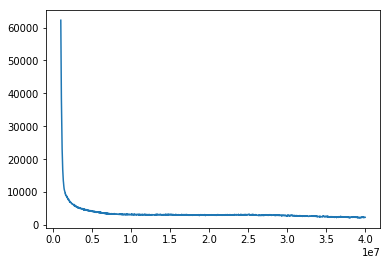

In [21]:
plt.plot(bins, counts)
plt.show()

In [134]:
fwhm_percent_2 = []
for i in fwhm_values_2:
    fwhm_percent_2.append(round(i/1332.5, 7)) 

In [100]:
print(fwhm_percent_2[0:20])
print(m_values_ns_2[0:20])

[0.3810545, 0.0439896, 0.0486131, 0.0544647, 0.0566318, 0.0565016, 0.0536821, 0.0458314, 0.0254151, 0.0069511, 0.0053308, 0.0047411, 0.0044177, 0.0042153, 0.0040768, 0.0039754, 0.0038938, 0.0038313, 0.0037859, 0.003757]
[0, 40, 80, 120, 160, 200, 240, 280, 320, 360, 400, 440, 480, 520, 560, 600, 640, 680, 720, 760]


[400, 440, 480, 520, 560, 600, 640, 680, 720, 760, 800, 840, 880, 920, 960, 1000, 1040, 1080, 1120, 1160]
[0.0053308, 0.0047411, 0.0044177, 0.0042153, 0.0040768, 0.0039754, 0.0038938, 0.0038313, 0.0037859, 0.003757, 0.0037457, 0.0037519, 0.0037513, 0.0037569, 0.0037608, 0.0037704, 0.0037829, 0.0037926, 0.0038009, 0.0038061]


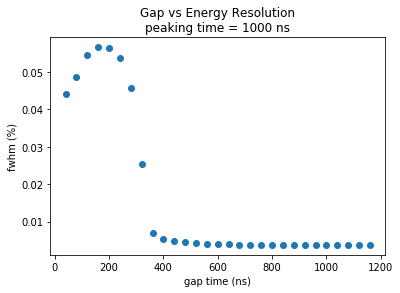

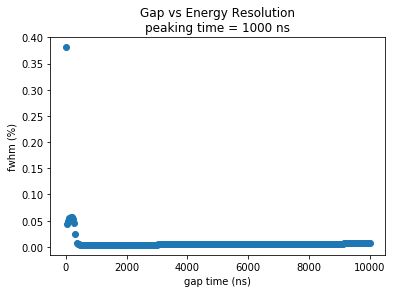

0.0037457
20
0.0037457
800


In [120]:
plt.plot(m_values_ns_2[1:30], fwhm_percent_2[1:30], 'o')
print(m_values_ns_2[10:30])
print(fwhm_percent_2[10:30])
plt.xlabel('gap time (ns)')
plt.ylabel('fwhm (%)')
plt.savefig('gap_optimization.png')
plt.title('Gap vs Energy Resolution' + '\n'  + 'peaking time = 1000 ns')
plt.show()

plt.plot(m_values_ns_2, fwhm_percent_2, 'o')
plt.xlabel('gap time (ns)')
plt.ylabel('fwhm (%)')
#plt.savefig('gap_optimization.png')
plt.title('Gap vs Energy Resolution' + '\n'  + 'peaking time = 1000 ns')
plt.show()

print(min(fwhm_percent_2))
print(np.argmin(fwhm_percent_2))
print(fwhm_percent_2[np.argmin(fwhm_percent_2)])
print(m_values_ns_2[np.argmin(fwhm_percent_2)])

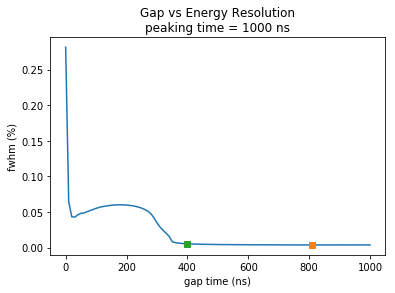

0.00375025014555
81
0.00375025014555
810


In [127]:
plt.plot(m_values_ns[0:100], fwhm_percent[0:100])
plt.plot(np.argmin(fwhm_percent) * 10, fwhm_percent[np.argmin(fwhm_percent)], 's')
plt.plot(m_values_ns[40], fwhm_percent[40], 's')
plt.xlabel('gap time (ns)')
plt.ylabel('fwhm (%)')
plt.savefig('gap_optimization_2.png')
plt.title('Gap vs Energy Resolution' + '\n'  + 'peaking time = 1000 ns')
plt.show()
print(min(fwhm_percent))
print(np.argmin(fwhm_percent))
print(fwhm_percent[np.argmin(fwhm_percent)])
print(m_values_ns[np.argmin(fwhm_percent)])

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190]


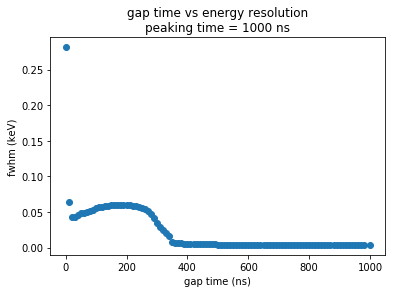

In [78]:
plt.plot(m_values_ns, fwhm_percent, 'o')
print(m_values_ns[0:20])
plt.xlabel('gap time (ns)')
plt.ylabel('fwhm (keV)')
plt.savefig('gap_optimization.png')
plt.title('gap time vs energy resolution' + '\n'  + 'peaking time = 1000 ns')
plt.show()

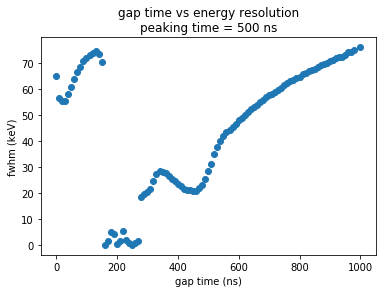

In [69]:
plt.plot(m_values_ns, fwhm_values, 'o')
plt.xlabel('gap time (ns)')
plt.ylabel('fwhm (keV)')
plt.savefig('gap_optimization.png')
plt.title('gap time vs energy resolution' + '\n'  + 'peaking time = 500 ns')
plt.show()

In [ ]:
plt.plot(bins, co_counts)
plt.show()
plt.plot(bins[200:400], co_counts[200:400])
plt.show()
plt.plot(bins[400:], co_counts[400:])
plt.show()

In [ ]:
plt.plot(m_values, index, 'o')
plt.show()

In [ ]:
plt.plot(m_values_ns, fwhm_values, 'o')
plt.show()

In [ ]:
plt.plot(m_values_ns, fwhm_values, 'o')
plt.xlabel('gap time (ns)')
plt.title('variable gap with peaking time = 1')
plt.show()

In [ ]:
# END HERE STOP 

In [ ]:
#k_values = np.linspace(500, 10000, 2) # steps in 100 ns from 1ns to 10us
m_values = np.linspace(0, 100000, 10) # steps in 100 ns from 1ns to 10us

M = 4400

k = 100
#m_values = np.linspace(1, 10000, 10)

fwhm_values = []
m_values_ns = []
index = []
for m in m_values:
    print(m)
    m_values_ns.append(m * 10)
    nrgs = []
    number_of_events = len(raw_data)
    assert number_of_events <= len(raw_data)

    for i in range(0, number_of_events, 1):
        signal = raw_data[i,:]
        nrg = filter_and_get_energy(signal, l, k, M)
        nrgs.append(round(nrg, 7))
        
    nbins = 2048
    co_counts, bin_edges = np.histogram(nrgs, bins=2048, range=[2.3e8, 2.9e8]) # WORKS
    bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
    index.append(np.argmax(co_counts))
   # co_energies = calibrate_co_spectrum(nrgs)
    #fwhm, center = get_energy_resolution_co_1173(co_energies, co_counts)
  #  fwhm, center = get_energy_resolution_co_1332(co_energies, co_counts)
        
  #  fwhm_values.append(fwhm)
        

In [ ]:

if __name__ == "__main__":

    filename = './DATA_co60_2.h5'
    hf = tables.open_file(filename, "r")

    event_data = hf.root.EventData.read()
    raw_data = hf.root.RawData.read()
    hf.close()

    sampling_time = 10.0
    n_data = 4096
    x_values = np.linspace(0, n_data, n_data)
    print("XVAL" , len(x_values))

    k = 100 # peaking
    m = 100 # gap
    raw_signal = raw_data[2,:]
    print("RAW ", len(raw_signal))
    plt.plot(x_values, raw_signal)
    signal = baseline_correction(raw_signal)
    signal = trapezoidal_filter_2(signal, m, k)

    plt.figure(41)
    plt.cla()
    plt.clf()
    plt.plot(x_values, signal)
    plt.title('sample sig')
    plt.show()

    energy = get_energy_value(signal)
    print(energy)

    nrgs_2 = []
    number_of_events = len(raw_data)
    number_of_events = 1
    assert number_of_events < len(raw_data)
    k = 100 # peaking time
    l = 100 # gap

    for i in range(0, number_of_events, 1):
        gap = 100
        peak = 100
        signal = raw_data[i,:]
        signal = baseline_correction(signal)
        maxval = max(signal)
        signal = signal / maxval
        signal = trapezoidal_filter_2(signal, gap, peak)
        signal = signal / 424829.69
        print('gain = ', max(signal))
        nrg = get_energy_value(signal)
        #nrg = filter_and_get_energy(raw_data[i,:], gap, peak)
        nrgs_2.append(round(nrg, 7))



    plt.hist(nrgs_2, 500, log=True)
    plt.show()

In [ ]:
# filename = 'data/co60.h5'
start = time.time()
filename = 'data/DATA_co60_2.h5'
raw_data = import_data(filename)

end1 = time.time()
print('import')
print(end1 - start)

start = time.time()
sampling_time = 10.0
n_data = 4096
x_values = np.linspace(0, n_data, n_data)
#M = find_M_value(raw_data, 10)
M = 4400

end1 = time.time()
print('M')
print(end1 - start)

start = time.time()
print(M)
#M = 4400
raw_signal = raw_data[2,:]
signal = baseline_correction(raw_signal)

end1 = time.time()
print('baseline')
print(end1 - start)
start = time.time()

plt.plot(signal)
plt.show()

end1 = time.time()
print('plot')
print(end1 - start)
start = time.time()

peaking_time = 100 
gap = 100 
#M = 4400
filtered_signal = fast_trapezoidal_filter(signal, gap, peaking_time, M)

end1 = time.time()
print('trap')
print(end1 - start)
start = time.time()

plt.figure(41)
plt.cla()
plt.clf()
plt.plot(x_values, filtered_signal)
plt.show()
energy = get_energy_value(filtered_signal)
print(energy)

In [ ]:
nrgs = []
number_of_events = len(raw_data)
assert number_of_events <= len(raw_data)

M = find_M_value(raw_data, 10)

k = 100 # peaking time
l = 100 # gap

for i in range(0, number_of_events, 1):
    signal = raw_data[i,:]
    nrg = filter_and_get_energy(signal, l, k, M)
    nrgs.append(round(nrg, 7))

In [ ]:
nbins = 2048
counts, bin_edges = np.histogram(nrgs, bins=2048, range=[1.75e8, 2.9e8]) #range=[2.3e8, 2.9e8] WORKS
bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
plt.figure()
plt.plot(bins, counts)
plt.title('Co-60 Spectrum')
plt.ylabel('counts')
plt.xlabel('channel')
plt.savefig('./co60.pdf')
plt.show()

nbins = 2048
counts, bin_edges = np.histogram(nrgs, bins=2048, range=[2.3e8, 2.9e8]) # WORKS
bins = (bin_edges[1:]+bin_edges[:-1])/2 # bin centers from bin edges
plt.figure()
plt.plot(bins, counts)
plt.title('Co-60 Spectrum')
plt.ylabel('counts')
plt.xlabel('channel')
plt.savefig('./co60.pdf')
plt.show()


In [ ]:
co_energies = calibrate_co_spectrum(nrgs)


In [ ]:
plt.plot(co_energies, counts)
plt.show()

In [ ]:
energy_values = []
fwhm_values = []

fwhm, center = get_energy_resolution_co_1332(co_energies, counts)
fwhm_values.append(fwhm)
energy_values.append(center)

plt.plot(energy_values, fwhm_values, 'o')
plt.show()